<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Desafios_python/blob/main/conhecimentos_tecnicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from openpyxl import Workbook

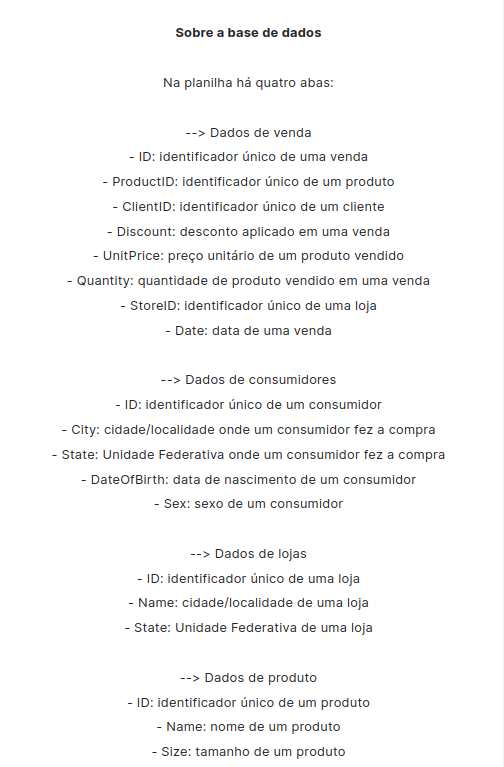

# Engenharia de feature-Dados de Venda (sheet1)

In [ ]:
# Carregando os Dados

import pandas as pd

venda = pd.read_excel("/content/drive/MyDrive/Desafio_JR/Base de Dados - Questionário.xlsx",
                     sheet_name="Sheet1", header=4)
venda.head()

,Unnamed: 0,Unnamed: 1,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21


In [ ]:
# Linhas X Colunas
venda.shape

(32753, 10)

In [ ]:
# Eliminando Colunas
venda.drop(["Unnamed: 0",	"Unnamed: 1"], axis=1, inplace=True)

In [ ]:
#Visualizando conjunto de Dados
venda.head()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21


In [ ]:
# Linhas X Colunas
venda.shape

(32753, 8)

* Com o `venda.info()` percebemos que nosso Data Frame `não possui linhas NaN` e podemos análisar o Dtype de cada coluna.

In [ ]:
# Analisando as informações do DataFrame Vendas
venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  float64       
 4   UnitPrice  32753 non-null  float64       
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


* Com o `describe` obeservamos os valores não nulos, média, desvio padrão (distância dos valores da média), os quartis onde mostra os valores abaixo de 25% dos dados, 50% e 75% e tabém podemos análisar valores máximo e minimo de cada coluna.

In [ ]:
# Descrição estatística dos dados
venda.describe()

,ClientID,Discount,UnitPrice,Quantity,StoreID
count,32753.000000,32753.000000,32753.000000,32753.000000,32753.000000
mean,21225.185937,0.093012,221.644967,1.058651,3.752389
std,4262.194113,0.009536,112.535304,0.239606,3.827504
min,14001.000000,0.080000,114.800000,1.000000,1.000000
25%,17544.000000,0.080000,161.000000,1.000000,1.000000
50%,21130.000000,0.100000,204.400000,1.000000,3.000000
75%,24916.000000,0.100000,233.800000,1.000000,4.000000
max,28695.000000,0.100000,686.000000,3.000000,22.000000


* Utilizando o `"drop_duplicates"` percebemos mais uma vez que nossos `dados não possuem valores missing.`

In [ ]:
# Verificando e apagando linhas duplicadas
venda.drop_duplicates()

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,0.08,218.4,1,4,2018-12-02
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,0.08,210.0,1,4,2018-12-05
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,2019-08-01
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,0.10,218.4,2,4,2019-11-25


In [ ]:
# Visualizando a dimensão do conjunto de dados (Linhas X Colunas)
venda.shape

(32753, 8)

* Com o método `value_counts` visualizamos que temos `32.753 IDs diferentes (identificador único de uma Venda)` e a contagem de `ocorrências de cada ID é 1` o que indica que não há repetições.

***Que indica que temos 32.753 vendas realizadas.***

In [ ]:
quantidade = venda["ID"].value_counts()
print(quantidade)

80260d682079b6090c8285b398c50d97    1
500b81d8def329a51bfbf84cfaa693a5    1
f0296e2322376fd2e7922b8deca72695    1
576b53e8a0ba4dbac33bb12976bf8754    1
df6b027b8ccc733f264b64dd4f6de13a    1
                                   ..
4b87f012cca8b66163cea1b82d4afc2b    1
c6f49a15fe46f3d10b7fb0ad871f8ba3    1
b9b6258fd7df83978bd49c201c288953    1
087f003cb486254f7454eead9265e992    1
56c87d433bb46c7862e35e791b1907fa    1
Name: ID, Length: 32753, dtype: int64


* `ProductID` (Indentificador único do produto) possui `73 valores únicos`


***Que indica que temos 73 produtos.***

In [ ]:
quantidade = venda["ProductID"].value_counts()
print(quantidade)

002ec297b1b00fb9dde7ee6ac24b67713    966
002d4ea7c04739c130bb74d7e7cd16943    963
001c5d71ac6ad696d22315953758fa043    944
0011c512eb256aa0dbbb544d8dffcf6e3    940
0030026a6ddb3b2d1d4bc225b4b4c4da3    939
                                    ... 
00088930e925c41fd95ebfe695fd26552    205
00210e41887c2a8ef9f791ebc780cc362    204
002ec297b1b00fb9dde7ee6ac24b67711    202
002552c0663708129c0019cc97552d7d2    200
001b237c0e9bb435f2e54071129237e92    197
Name: ProductID, Length: 73, dtype: int64


* Aqui temos ClienteID (Identificador único de um cliente) `13.650 identificadores únicos`.

***Que indica que temos 13.650 clientes.***

In [ ]:
quantidade = venda["ClientID"].value_counts()
print(quantidade)

17631    9
22056    9
19089    9
26177    9
15499    8
        ..
23259    1
23255    1
23254    1
23252    1
28695    1
Name: ClientID, Length: 13650, dtype: int64


# Engenharia de feature-Dados de Produto (Sheet2)

In [ ]:
# Abrindo arquivo para leitura

produto = pd.read_excel("/content/drive/MyDrive/Desafio_JR/Base de Dados - Questionário.xlsx", sheet_name="Sheet2")

# Visualização "aleatórios" dos dados
produto.sample(10)

,ID,Name,Size
63,0030026a6ddb3b2d1d4bc225b4b4c4da1,League Legends,P
24,001b237c0e9bb435f2e54071129237e91,Thanos,P
38,002159fe700ed3521f46cfcf6e941c763,Pokemon Go Squirtle,G
56,002c6dab60557c48cfd6c2222ef7fd763,Darth Vader,G
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
36,002159fe700ed3521f46cfcf6e941c761,Pokemon Go Squirtle,P
13,000d9be29b5207b54e86aa1b1ac548722,Batman,M
69,003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons,P
15,0011c512eb256aa0dbbb544d8dffcf6e1,Flash,P
59,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G


In [ ]:
# Linha X Coluna
produto.shape

(73, 3)

* Com o `venda.info()` percebemos que nosso Data Frame `não possui linhas NaN` e `podemos análisar o Dtype de cada coluna`.

In [ ]:
produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      73 non-null     object
 1   Name    73 non-null     object
 2   Size    73 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


* Usandoo método `describe`.
  * Coluna ID:
    * Existem 73 IDs no tota.
    * Todos os 73 IDs são únicos, o que significa que não há repetições.
    * Não possui um ID com frequência maior que 1.

  * Coluna Name:
    * Existem 24 nomes diferentes.
    * O nome mais comum é "Homer Simpsons", que aparece 4 vezes no total.

  * Coluna Size:
    * Existem 4 tamanhos únicos.
    * O tamanho mais comum é "P", que ocorre 24 vezes no total.

In [ ]:
produto.describe()

,ID,Name,Size
count,73,73,73
unique,73,24,4
top,00066f42aeeb9f3007548bb9d3f33c381,Homer Simpsons,P
freq,1,4,24


* O nosso Conjunto de Dados `não possui linhas duplicadas.`

In [ ]:
produto.drop_duplicates()

,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
...,...,...,...
68,0030e635639c898b323826589761cf233,Rick Morty,G
69,003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons,P
70,003128f981470c3e5a2e7445e4a771cd2,Homer Simpsons,M
71,003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons,G


In [ ]:
produto.shape

(73, 3)

* Aqui identificamos a quantidade de `saída de cada um dos produtos`.

In [ ]:
quantidade = produto["Name"].value_counts()
print(quantidade)

Homer Simpsons         4
Thor                   3
Rick Morty             3
League Legends         3
Bazinga                3
Iron Man               3
Darth Vader            3
Dragon Ball Z          3
Ciclope                3
Tempestade             3
BIXDream               3
Super Mario            3
Capitão América        3
Naruto                 3
Capitã Marvel          3
Wolverine              3
Thanos                 3
Mulher-Maravilha       3
Coringa                3
Flash                  3
Batman                 3
Pantera Negra          3
Deadpool               3
Pokemon Go Squirtle    3
Name: Name, dtype: int64


#Engenharia de feature-Dados de Consumidores (Sheet3)

In [43]:
# Abrindo os dados para leitura
consumidores= pd.read_excel("/content/drive/MyDrive/Desafio_JR/Base de Dados - Questionário.xlsx", sheet_name="Sheet3")

# Visualização "aleatórios" dos dados
consumidores.sample(10)

,ID,City,State,DateOfBirth,Sex
10633,25292,Curitiba,PR,1957-03-10,Mulher
10142,24727,São Paulo,SP,1992-08-17,Homem
11475,26243,Rio de Janeiro,RJ,1957-02-14,Homem
12189,27040,Belo Horizonte,MG,1966-08-08,Homem
10523,25163,Curitiba,PR,1952-08-16,Homem
6230,20302,Porto Alegre,RS,1982-10-06,Homem
12660,27581,Porto Alegre,RS,1965-01-08,Homem
10126,24709,Curitiba,PR,1984-03-02,Mulher
2786,16799,Florianópolis,SC,1980-03-03,Homem
8241,22574,São Paulo,SP,1988-12-21,Mulher


In [ ]:
# Linha X Coluna
consumidores.shape

(13650, 5)

* Percebemos que `não há valores nulos` e podemos analisar o type dos dados.

In [ ]:
consumidores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           13650 non-null  int64         
 1   City         13650 non-null  object        
 2   State        13650 non-null  object        
 3   DateOfBirth  13650 non-null  datetime64[ns]
 4   Sex          13650 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 533.3+ KB


Com o describe obeservamos os valores não nulos, média, desvio padrão (distância dos valores da média), os quartis onde mostra os valores abaixo de 25% da `coluna ID`, 50% e 75% e tabém podemos análisar valores máximo e minimo da `coluna ID`.

In [ ]:
consumidores.describe()

,ID
count,13650.000000
mean,21134.231062
std,4259.826939
min,14001.000000
25%,17430.250000
50%,20961.000000
75%,24834.750000
max,28695.000000


* `Não há linhas duplicadas.`

In [ ]:
consumidores.drop_duplicates()

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,1985-06-28,Homem
1,14002,Florianópolis,SC,1987-01-10,Homem
2,14003,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005,Florianópolis,SC,1969-04-07,Homem
...,...,...,...,...,...
13645,28689,Belo Horizonte,MG,1999-01-15,Homem
13646,28691,Belo Horizonte,BH,1956-02-07,Homem
13647,28692,Porto Alegre,RS,1985-10-19,Homem
13648,28694,Curitiba,PR,1982-10-22,Homem


In [ ]:
consumidores.shape

(13650, 5)

* Aqui Podemos perceber que `temos 13.650 consumidores`

In [ ]:
quantidade = consumidores["ID"].value_counts()
print(quantidade)

14001    1
23528    1
23531    1
23532    1
23533    1
        ..
18575    1
18576    1
18577    1
18578    1
28695    1
Name: ID, Length: 13650, dtype: int64


* Aqui vemos que `trabalhamos com 123 cidades.`

In [ ]:
quantidade = consumidores["City"].value_counts()
print(quantidade)

Florianópolis        3449
Rio de Janeiro       2810
Porto Alegre         2536
Curitiba             2123
São Paulo            1393
                     ... 
Cubatao                 1
Itapeva                 1
Vila velha              1
Braganca paulista       1
Ourinhos                1
Name: City, Length: 123, dtype: int64


* Identificamos quais `estados que nossa empresa fornece` produtos e a `quantidade de produtos fornecidos para cada estado`.

In [39]:
quantidade = consumidores["State"].value_counts()
print(quantidade)

SC    3459
RJ    2844
RS    2554
PR    2132
SP    1509
MG     763
BH     352
ES       7
MT       6
MA       4
RO       4
GO       3
BA       3
RN       3
AC       3
RR       2
PA       1
MS       1
Name: State, dtype: int64


* Aqui podemos ver qua a `maior parte de nossos clientes são do sexo masculino`.

In [41]:
quantidade = consumidores["Sex"].value_counts()
print(quantidade)

Homem     11972
Mulher     1678
Name: Sex, dtype: int64


#Engenharia de feature-Dados de Lojas (Sheet4)


In [ ]:
# Realizando a leitura dos dados
loja = pd.read_excel("/content/drive/MyDrive/Desafio_JR/Base de Dados - Questionário.xlsx", sheet_name="Sheet4")

loja.head(7)

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


In [ ]:
# Linha X Coluna
loja.shape

(7, 3)

* Observando o type de cada coluna.

In [44]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      7 non-null      int64 
 1   Name    7 non-null      object
 2   State   7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


#Visualização

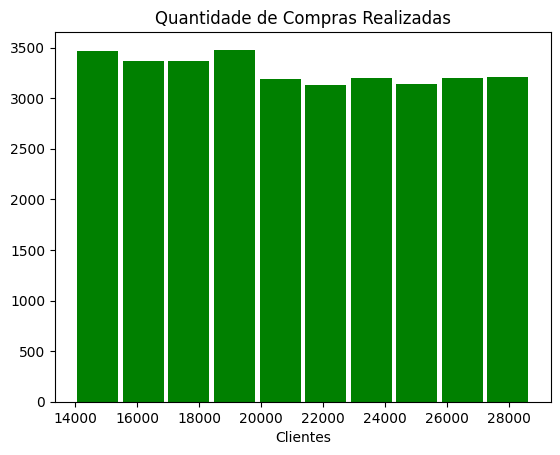

In [62]:
#plt.figure(figsize= (15,10))
plt.hist(venda['ClientID'], color="green", rwidth=0.9)

plt.title("Quantidade de Compras Realizadas")
plt.xlabel("Clientes")
plt.show()

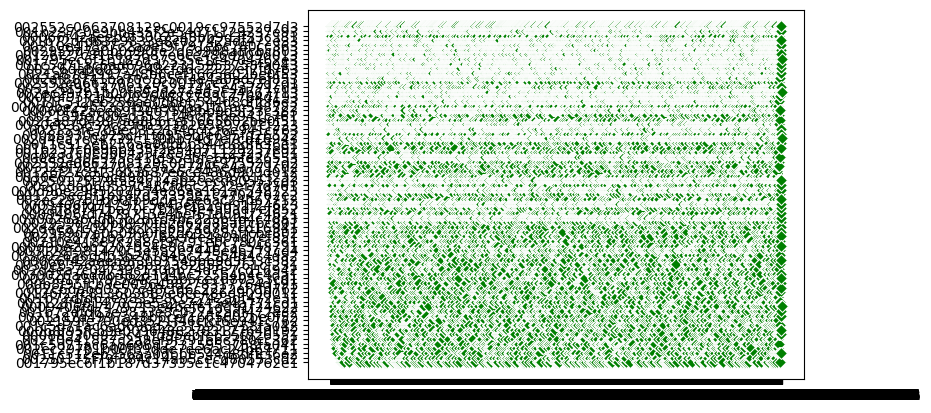

In [63]:
sns.lineplot(data=venda, x="ID", y="ProductID", color="green", marker="D")

plt.title("")
plt.xlabel("")
plt.ylabel('')
plt.show()